# Install libraries

In [3]:
!pip install ultralytics
!pip install squarify
!pip install pytesseract

# Import libraries

In [1]:
from ultralytics import YOLO
import squarify
import matplotlib.pyplot as plt
import cv2
import os
import random
import pandas as pd
import matplotlib.image as mpimg
import seaborn as sns
import pytesseract
from PIL import Image
import random
import numpy as np
import re
from IPython.display import display
pytesseract.pytesseract.tesseract_cmd = "C:/Program Files/Tesseract-OCR/tesseract.exe"
os.environ['TESSDATA_PREFIX'] = "C:/Program Files/Tesseract-OCR/tessdata"
sns.set_style('darkgrid')
%matplotlib inline

# Object detection

## Image shape

In [2]:
image = cv2.imread("./train/images/0_jpg.rf.44fc9955ce824d70d02c4e88ec75ec4a.jpg")
# Get the size of the image
height, width, channels = image.shape
print(f"The image has dimensions {width}x{height} and {channels} channels.")

The image has dimensions 640x640 and 3 channels.


## Training phase

In [6]:
# Loading a pretrained model
model = YOLO('yolov8n.pt')

# Training the model
model.train(data = '/kaggle/input/egyptian-national-id/data.yaml',
            epochs = 50,
            imgsz = height,
            seed = 42,
            batch = 64,
            workers = 4)

  0%|          | 0.00/6.23M [00:00<?, ?B/s]

New https://pypi.org/project/ultralytics/8.0.208 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.206  Python-3.9.12 torch-1.13.0+cpu CPU (Intel Core(TM) i7-8565U 1.80GHz)
WARNING  Upgrade to torch>=2.0.0 for deterministic training.
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/input/egyptian-national-id/data.yaml, epochs=50, patience=50, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True,

In [ ]:
results = pd.read_csv("/kaggle/working/runs/detect/train/results.csv")
results.columns

Index(['                  epoch', '         train/box_loss',
       '         train/cls_loss', '         train/dfl_loss',
       '   metrics/precision(B)', '      metrics/recall(B)',
       '       metrics/mAP50(B)', '    metrics/mAP50-95(B)',
       '           val/box_loss', '           val/cls_loss',
       '           val/dfl_loss', '                 lr/pg0',
       '                 lr/pg1', '                 lr/pg2'],
      dtype='object')

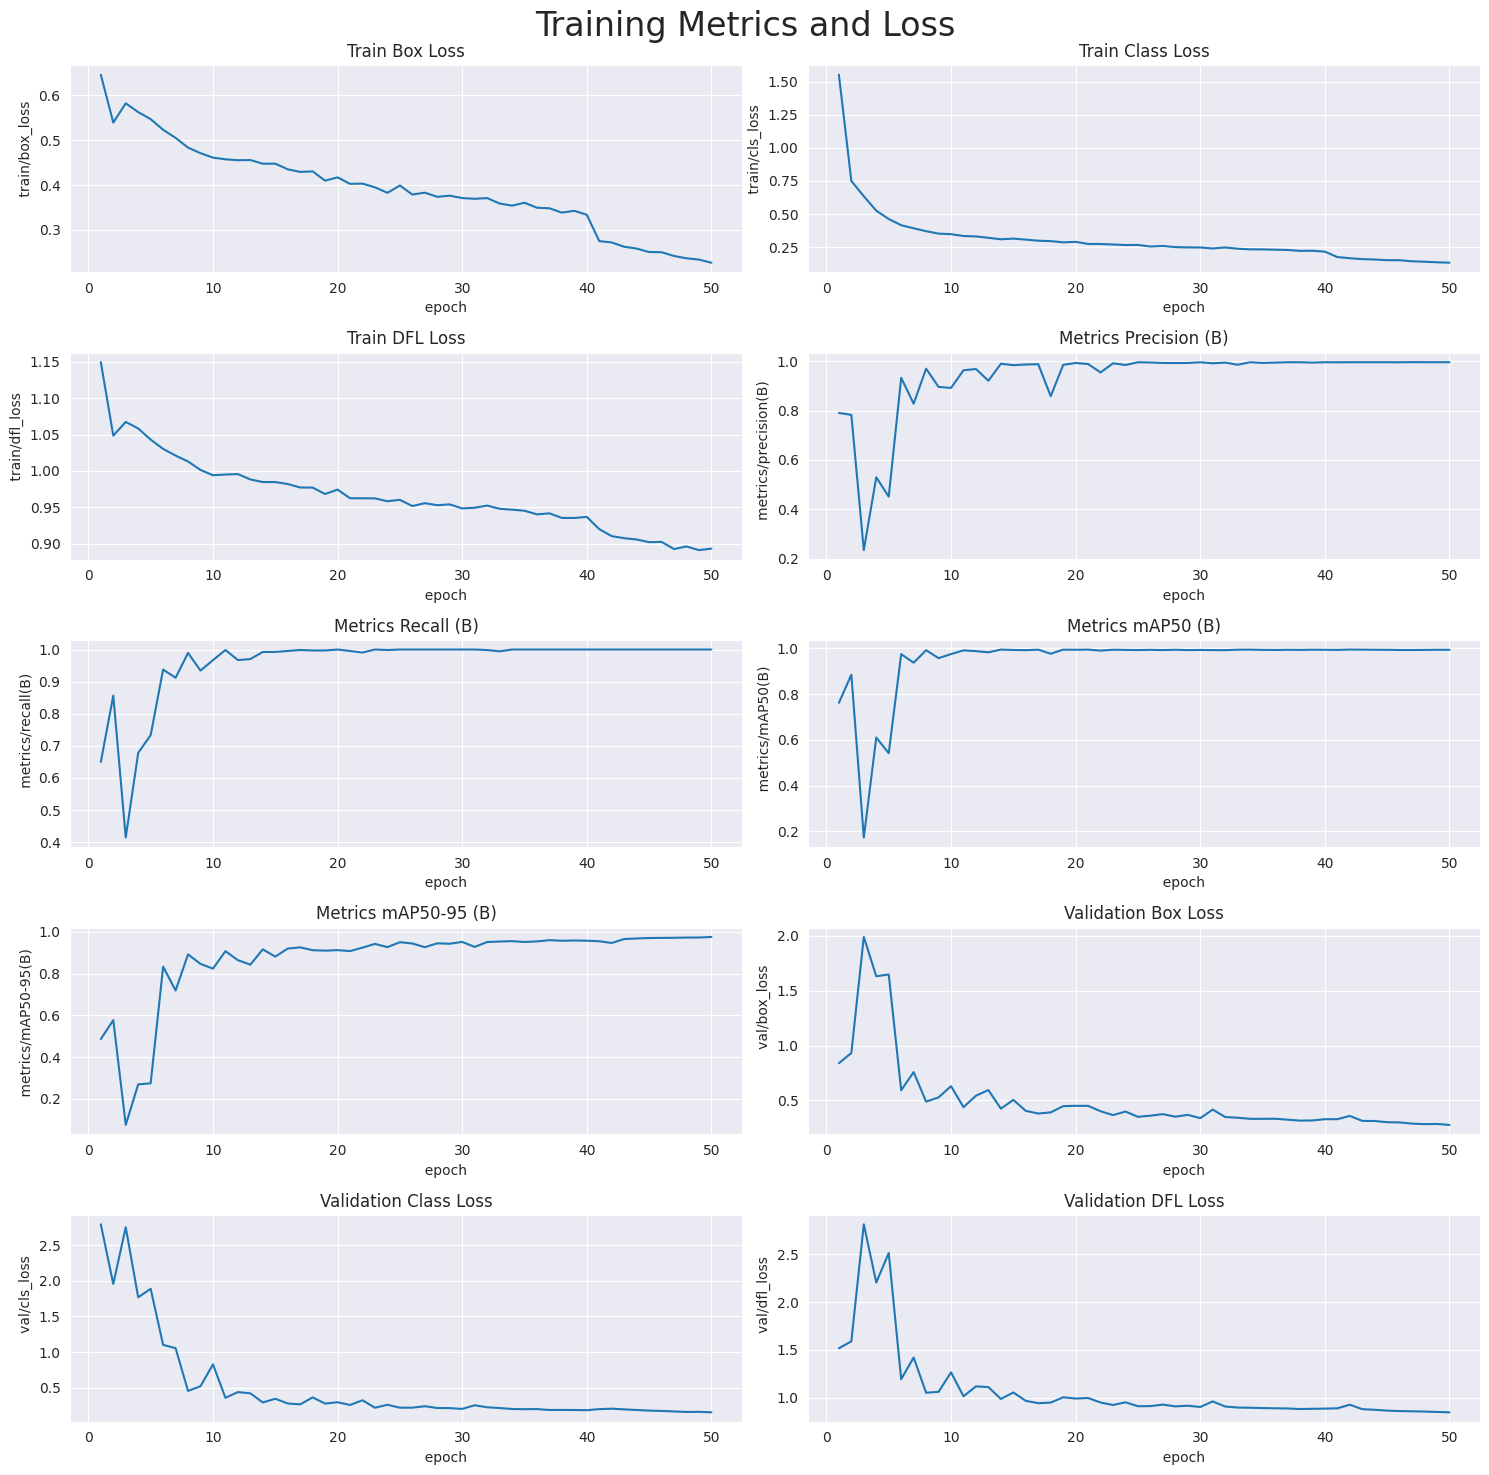

In [ ]:
results = pd.read_csv("/kaggle/working/runs/detect/train/results.csv")

# create subplot
fig,axs = plt.subplots(nrows = 5, ncols = 2, figsize = (15,15))

# plot the columns using seaborn
sns.lineplot(x='                  epoch', y='         train/box_loss', data=results, ax=axs[0,0])
sns.lineplot(x='                  epoch', y='         train/cls_loss', data=results, ax=axs[0,1])
sns.lineplot(x='                  epoch', y='         train/dfl_loss', data=results, ax=axs[1,0])
sns.lineplot(x='                  epoch', y='   metrics/precision(B)', data=results, ax=axs[1,1])
sns.lineplot(x='                  epoch', y='      metrics/recall(B)', data=results, ax=axs[2,0])
sns.lineplot(x='                  epoch', y='       metrics/mAP50(B)', data=results, ax=axs[2,1])
sns.lineplot(x='                  epoch', y='    metrics/mAP50-95(B)', data=results, ax=axs[3,0])
sns.lineplot(x='                  epoch', y='           val/box_loss', data=results, ax=axs[3,1])
sns.lineplot(x='                  epoch', y='           val/cls_loss', data=results, ax=axs[4,0])
sns.lineplot(x='                  epoch', y='           val/dfl_loss', data=results, ax=axs[4,1])

# set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')

# add suptitle and subheader
plt.suptitle('Training Metrics and Loss', fontsize=24)

# adjust top margin to make space for suptitle
plt.subplots_adjust(top=0.8)

# adjust spacing between subplots
plt.tight_layout()

plt.show()

## Evaluation phase

In [ ]:
model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')
metrics = model.val(conf=0.5)

Ultralytics YOLOv8.0.208 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /kaggle/input/egyptian-national-id/valid/labels... 637 images, 0 backgrounds, 0 corrupt: 100%|██████████| 637/637 [00:00<00:00, 805.95it/s]
val: WARNING ⚠️ Cache directory /kaggle/input/egyptian-national-id/valid is not writeable, cache not saved.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:06<00:00,  6.60it/s]
                   all        637        671      0.996          1      0.994      0.976
Speed: 0.6ms preprocess, 3.9ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/val


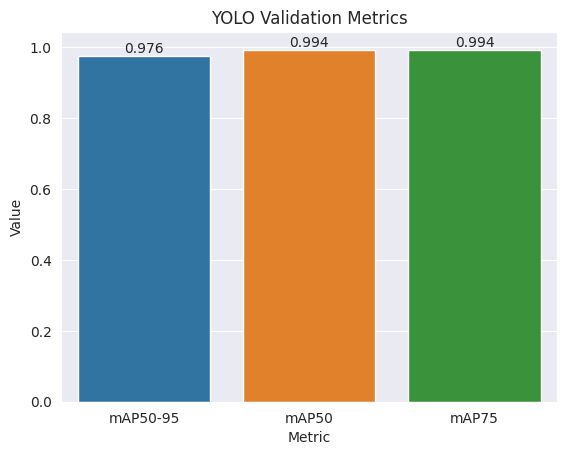

In [ ]:
# Create the barplot
ax = sns.barplot(x=['mAP50-95', 'mAP50', 'mAP75'], y=[metrics.box.map, metrics.box.map50, metrics.box.map75])

# Set the title and axis labels
ax.set_title('YOLO Validation Metrics')
ax.set_xlabel('Metric')
ax.set_ylabel('Value')

# Add the values on top of the bars
for p in ax.patches:
    ax.annotate('{:.3f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Show the plot
plt.show()

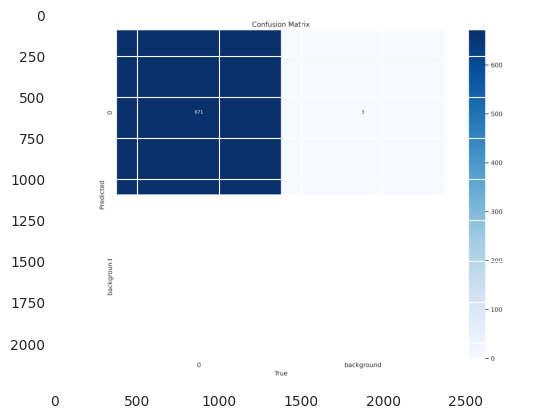

In [ ]:
plt.imshow(plt.imread('/kaggle/working/runs/detect/train/confusion_matrix.png'))

## Prediction phase

In [21]:
def detect_id(img_path):
    #Read image
    img = cv2.imread(img_path)
    bbox = []
   # Detecting
    mod = YOLO('./best.pt')
    detect_img = mod.predict(img)
    img = detect_img[0].orig_img
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    for box in detect_img[0].boxes.xyxy:
        x,y,x2,y2 = box
        x, y, x2, y2 = int(x), int(y), int(x2), int(y2)
        bbox.append(x)
        bbox.append(y)
        bbox.append(x2)
        bbox.append(y2)
        img = cv2.rectangle(img,(x,y),(x2,y2),(255, 0, 0),3)
    img = np.array(img)
    return img,bbox


0: 640x640 1 0, 185.7ms
Speed: 3.3ms preprocess, 185.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 0, 159.2ms
Speed: 5.5ms preprocess, 159.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 0, 157.0ms
Speed: 4.4ms preprocess, 157.0ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 0, 206.6ms
Speed: 7.8ms preprocess, 206.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 0, 169.9ms
Speed: 3.7ms preprocess, 169.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 0, 171.9ms
Speed: 2.0ms preprocess, 171.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 0, 164.9ms
Speed: 6.2ms preprocess, 164.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 0, 151.4ms
Speed: 3.5ms preprocess, 151.4ms inference, 9.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 0,

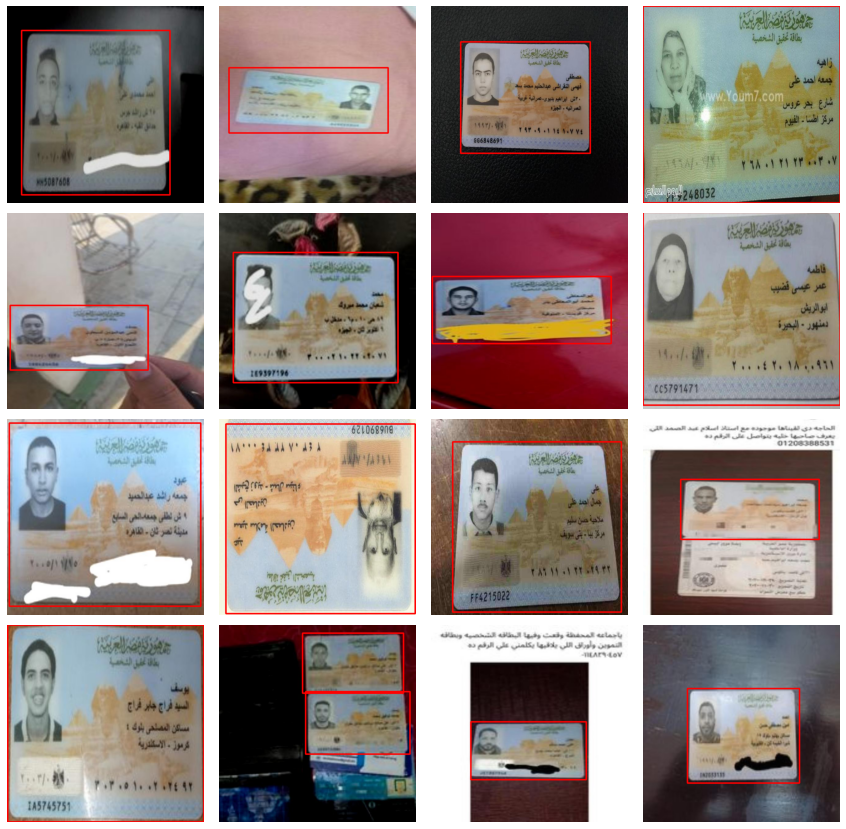

In [22]:
test_data = './test/images'

# Get the list of image files in the directory
image_files = os.listdir(test_data)

# Select 16 random images from the list
selected_images = random.sample(image_files, 16)

# Create a figure with subplots for each image
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

# Iterate over the selected images and plot each one
for i, img_file in enumerate(selected_images):
    
    # Compute the row and column index of the current subplot
    row_idx = i // 4
    col_idx = i % 4
    # Load the current image and run object detection
    img_path = os.path.join(test_data, img_file)
    detect_img,bbox = detect_id(img_path)
    # Plot the current image on the appropriate subplot
    axes[row_idx, col_idx].imshow(detect_img)
    axes[row_idx, col_idx].axis('off')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.05, hspace=0.05)

# Rotated ID

In [56]:
def rotated_id (detected_image,rotation_angle):
    # Get the height and width of the detected image
    height, width = detected_image.shape[:2]

    # Calculate the rotation center (the center of the image)
    center = (width // 2, height // 2)

    # Perform the rotation using the OpenCV rotation matrix
    rotation_matrix = cv2.getRotationMatrix2D(center, rotation_angle, 1.0)
    rotated_image = cv2.warpAffine(detected_image, rotation_matrix, (width, height))

    # Save or display the rotated image
    cv2.imwrite('rotated_image.jpg', rotated_image)
    plt.imshow(rotated_image)
    return rotated_image


0: 384x640 1 0, 143.8ms
Speed: 0.0ms preprocess, 143.8ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)


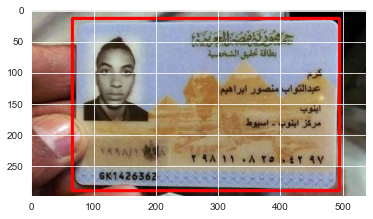

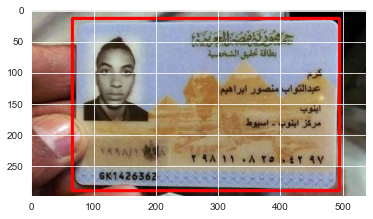

In [58]:
detect_img,bbox = detect_id("./data_set/7.jpg")
plt.imshow(detect_img)
plt.show()
rotated_image = rotated_id(detect_img,0)

# OCR

In [54]:
def Extract_text(image,bbox):
    x,y,x2,y2 = bbox
    cropped_object = image[y:y2, x:x2]

    detect_text = pytesseract.image_to_string(cropped_object, lang='ara', config=r'--oem 3 --psm 6' )
    cleaned_line = re.sub(r'[^\u0600-\u06FF\s]', '', detect_text).strip()
    with open('file.txt', 'w', encoding='utf-8') as file:
        file.write(cleaned_line)
    plt.imshow(cropped_object)
    return cleaned_line

'ورك مم ليد\nبطاقة تحقيق الشخصية  \nكرم\nعبدالتواب منصور ابراهيم ١ \nابتوب \nمركز ابتوب  اسيوط تعن\nنوكل مرف زللة ا\nلماي و قت  لمكي'

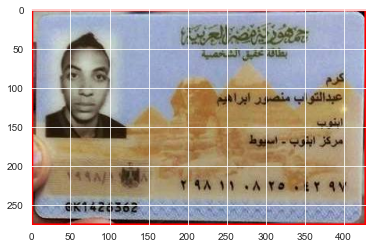

In [55]:
Extract_text(detect_img,bbox)

# Program

In [60]:
def Line_Extractor (image_path, rotation_angle):
    detect_img,bbox = detect_id(image_path)
    rotated_image = rotated_id(detect_img,rotation_angle)
    lines = Extract_text(rotated_image,bbox)
    return lines


0: 384x640 1 0, 131.9ms
Speed: 4.8ms preprocess, 131.9ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)


'ورك مم ليد\nبطاقة تحقيق الشخصية  \nكرم\nعبدالتواب منصور ابراهيم ١ \nابتوب \nمركز ابتوب  اسيوط تعن\nنوكل مرف زللة ا\nلماي و قت  لمكي'

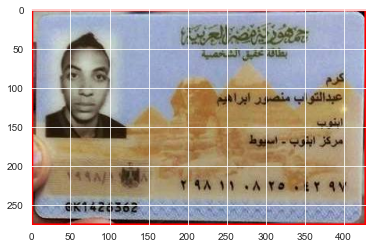

In [61]:
Line_Extractor("./data_set/7.jpg",0)